In [31]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string
import sys

https://www.jccal.org/Default.asp?ID=341&pg=Board+of+Registrars

# VEST AL 2020
---

## VEST Documentation

### Election Results

#### Sources
Election results from the Alabama Secretary of State Elections Division (https://www.sos.alabama.gov/alabama-votes/voter/election-data). 

#### Processing
Absentee and provisional ballots were reported countywide in all counties. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.


### Shapefiles

#### Sources
Precinct shapefiles initially from the U.S. Census Bureau's 2020 Redistricting Data Program final release, except the following counties use shapefiles sourced from the respective county governments instead: Baldwin, Blount, Calhoun, Cullman, DeKalb, Franklin, Jefferson, Lee, Limestone, Madison, Marengo, Marshall, Mobile, Morgan, St. Clair, Shelby, Talladega, Tuscaloosa.

### Processing
Precinct boundaries were adjusted as appropriate to align with county maps, municipal boundaries, or commission districts. Precinct boundaries throughout the state were further reviewed with the voter registration file in effect for the November 2020 general election. Voting districts in nearly all counties were edited accordingly to align with reporting units in the 2020 election results. In many counties the resulting boundaries bear little resemblance to the 2020 Census VTDs. As these boundary revisions were so extensive only splits and merges are specified below by precinct.

Many precincts have outdated names in the Census VTDs. The Census VTDs also have at least some precinct names in wrong locations for the following counties: Clarke, Clay, Cleburne, Conecuh, Dallas, Escambia, Geneva, Greene, Jefferson, Lauderdale, Limestone, Marion, Marshall, Monroe, Perry, Randolph, Russell, Tallapoosa, Walker, Washington, Wilcox. Moreover, many precinct numbers and consequently the VTD GeoIDs are also incorrect throughout much of the state in the Census shapefiles. All precinct names and numbers have been edited to match the 2020 voter file.

The following splits and merges were made to align voting district boundaries with reporting units in the 2020 election results.

- Barbour: Split Eufaula between Bevill/CC/Fellowship/McCoo/Sanford/WB
- Calhoun: Add precinct splits to Beats 1, 4, 5, 9, 12, 13, 15, 19, 22
- Cherokee: Split Friendship/Mt Calvary, McCord's/Rock Run, Mt Weisner/VFD #2
- Choctaw: Split Cromwell/Halsell/Intersection
- Clarke: Split Antioch/Grove Hill/Helwestern, Choctaw Bluff/Gainstown, Grove Hill NG/Whatley, Jackson/Skipper, Springfield/Thomasville; Merge Fulton FS/CH
- Colbert: Merge Mynot into Allsboro/Cherokee
- Covington: Split Heath/Straughn, Pleasant Home/Wing
- Cullman: Split Cullman City Hall/Civic Ctr/Conf Room/Courthouse
- Dallas: Merge Marion Jct/New Friendship
- DeKalb: Merge Antioch/Fyffe, Pea Ridge into Hammondville/Henagar/Ider, Five Points/Senior Center
- Etowah: Merge Fords Valley/Hokes Bluff, Tabernacle/Walnut Park
- Fayette: Split Browns-Glen Allen/Whites Chapel, Cole-Killingsworth/Paul Hubbert, Fayette CC/Covin/YC, Lee-Belk/Palestine
- Geneva: Split Bellwood/El Bethel, Flat Creek/Hacoda, Hughes VH/Malvern, Lowery/Revels, Piney Grove/Samson, Slocomb/Tate
- Jackson: Merge Aspel/Limrock, Bishop Hall/Estill Fork, Christian Home/Flat Rock, Garth/Trenton, Hambrick/Hollytree/Princeton
- Jefferson: Split 3030/3035 Bethel Baptist/Pleasant Grove; Merge 1120/1260 as Robinson Elementary, 2350/5270 as Oxmoor Valley
- Marion: Split Kimbrough N/S; Merge Hamilton N/S as ET Sims
- Monroe: Split Chrysler/Mineola, Coleman/Excel, Franklin/Wainwright, Peterman/Philadelphia
- Randolph: Split Bethel/Moores/Woodland, Cavers/Swagg, Corinth/Morrison, Midway/New Hope/Wedowee, Omaha/Tin Shop/Wehadkee, Rock Mills/Wilson
- Russell: Split Courthouse/Golden Acres
- Tallapoosa: Split Cooper/Duncan/Moncrief; Merge New Paces 901/902 to match county shapefile
- Wilcox: Split National Guard Camden, Pine Apple Comm Ctr, Pine Apple AWIN, St Paul Church
- Winston: Split Addison/Upshaw, Delmar/Natural Bridge, Haleyville/Neighborhood/Pebble/Waldrop, Lynn/Old Union, Nesmith/Helicon


# Election Result Processing

## Get VEST file and FIPS dictionary ready

### Load in VEST file

In [32]:
vest_al_20 = gp.read_file("./raw-from-source/VEST/al_2020/al_2020.shp")

In [33]:
vest_al_20.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

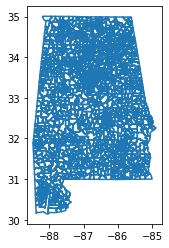

In [34]:
vest_al_20.boundary.plot()

In [35]:
vest_al_20.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G20PRERTRU',
       'G20PREDBID', 'G20PRELJOR', 'G20PREOWRI', 'G20USSRTUB', 'G20USSDJON',
       'G20USSOWRI', 'G20SSCRSHA', 'G20SSCOWRI', 'G20SSCRMEN', 'G20SSCOWR2',
       'G20SACRTHO', 'G20SACOWRI', 'G20SACRFRI', 'G20SACOWR2', 'G20SCCRWIN',
       'G20SCCOWRI', 'G20SCCRKEL', 'G20SCCOWR2', 'G20PSCRCAV', 'G20PSCDCAS',
       'G20PSCOWRI', 'geometry'],
      dtype='object')

In [36]:
vest_al_20.head(5)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREOWRI,G20USSRTUB,...,G20SACRFRI,G20SACOWR2,G20SCCRWIN,G20SCCOWRI,G20SCCRKEL,G20SCCOWR2,G20PSCRCAV,G20PSCDCAS,G20PSCOWRI,geometry
0,01,013,000100,01013000100,Monterey School House,25,37,2,0,25,...,26,1,26,1,25,1,25,35,0,"POLYGON ((-86.90894 31.96167, -86.90632 31.961..."
1,01,013,000181,01013000181,Bolling,100,50,0,0,95,...,101,1,101,1,99,1,99,48,0,"POLYGON ((-86.71867 31.73289, -86.71864 31.732..."
2,01,053,000080,01053000080,Rock Hill-Ridge VFD,265,60,3,0,251,...,262,5,259,6,262,4,257,63,0,"POLYGON ((-87.05166 31.11854, -87.04869 31.118..."
3,01,053,000120,01053000120,Damascus-Boykin School,180,143,2,1,172,...,189,2,189,2,189,2,171,145,0,"POLYGON ((-86.95858 31.16635, -86.95844 31.166..."
4,01,053,000100,01053000100,Bradley VFD,68,2,0,0,67,...,70,0,70,0,70,0,69,2,0,"POLYGON ((-86.82985 31.02083, -86.82983 31.020..."


### Create a FIPs dictionary

In [37]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Alabama"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
al_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Election Results

### Load, Pivot, Clean Election Results

There is a directory of excel files that need to be pivoted of election results. 

First, confirm that the file structure is the same for all of the files:

In [38]:
files = os.listdir('./raw-from-source/SOS/2020GeneralPrecinctResults/')

In [39]:
temp = pd.read_excel('./raw-from-source/SOS/2020GeneralPrecinctResults/2020-General-Autauga.xls')
columns = temp.columns
print(columns)

flag = True
for file in files: 
    temp = pd.read_excel('./raw-from-source/SOS/2020GeneralPrecinctResults/' + file)
    if columns.to_list()[:3] != temp.columns.to_list()[:3]:
        print(columns)
        print(temp.columns)
        flag = False
if flag:
    print('All files have the same first 3 columns: ', columns.to_list()[:3])

Index(['Contest Title', 'Party', 'Candidate', '10 JONES COMM_ CTR_',
       '100 TRINITY METHODIST', '110 CENTRAL AL ELECTRIC',
       '140 AUTAUGAVILLE VFD', '150 PRATTMONT BAPTIST',
       '160 DOSTER COMM_ CTR_', '170 CAMELLIA BAPTIST CHURCH',
       '180 OLD KINGSTON VFD', '20 HERITAGE BAPTIST', '220 UPPER KINGSTON',
       '230 COUNTY LINE BAPTIST', '30 BILLINGSLEY COMM_ CTR_',
       '40 E_ MEMORIAL CHRISTIAN', '50 WHITE CITY VFD', '60 MARBURY MIDDLE',
       '70 BOONE'S CHAPEL', '80 INDEPENDENCE VFD', '90 BOOTH VFD', 'ABSENTEE',
       'PROVISIONAL'],
      dtype='object')
All files have the same first 3 columns:  ['Contest Title', 'Party', 'Candidate']


Next, go through and pivot each file, clean them, and concatenate. 

In [40]:
def pivot_clean_county_file(df, county_name): 
    """Given a dataframe, pivot the table, order and rename columns, and return the cleaned table that can be concatenated. """
    
    df_pivot = pd.pivot_table(df,values=[x for x in df.columns.to_list() if x not in ('Contest Title','Party','Candidate')],
                              columns=['Contest Title',"Candidate"],aggfunc=sum)
    df_pivot['county'] = county_name
    df_pivot.reset_index(inplace = True)
    df_pivot.columns = [(x.strip(), y.strip()) for x,y in df_pivot.columns.values]
    
    if county_name in ('Randolph'):
        president = [('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Donald J. Trump Michael R. Penc'), 
            ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Joseph R. Biden Kamala D. Harri'), 
            ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Jo Jorgensen Jeremy "Spike" Coh'), 
            ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Write-In')]
    elif county_name in ('Barbour'):
        president = [('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Donald J. Trump'),
                          ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Joseph R. Biden'),
                          ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Jo Jorgensen Jeremy "Spike" Cohen'), 
                          ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Write-In')]
    else:
        president = [('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Donald J. Trump'),
                          ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Joseph R. Biden'),
                          ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Jo Jorgensen'),
                          ('PRESIDENT AND VICE PRESIDENT OF THE UNITED STATES', 'Write-In')]
    
    clean_df = df_pivot[[('index',''),('county','')] + president + 
                          [('UNITED STATES SENATOR', 'Tommy Tuberville'),
                          ('UNITED STATES SENATOR', 'Doug Jones'),
                          ('UNITED STATES SENATOR', 'Write-In'),
                          ('ASSOCIATE JUSTICE OF THE SUPREME COURT, PLACE 1', 'Greg Shaw'),
                          ('ASSOCIATE JUSTICE OF THE SUPREME COURT, PLACE 1', 'Write-In'),
                          ('ASSOCIATE JUSTICE OF THE SUPREME COURT, PLACE 2', 'Brad Mendheim'),
                          ('ASSOCIATE JUSTICE OF THE SUPREME COURT, PLACE 2', 'Write-In'),
                          ('COURT OF CIVIL APPEALS JUDGE, PLACE 1', 'William C. "Bill" Thompson'),
                          ('COURT OF CIVIL APPEALS JUDGE, PLACE 1', 'Write-In'),
                          ('COURT OF CIVIL APPEALS JUDGE, PLACE 2', 'Matt Fridy'),
                          ('COURT OF CIVIL APPEALS JUDGE, PLACE 2', 'Write-In'),
                          ('COURT OF CRIMINAL APPEALS JUDGE, PLACE 1', 'Mary Windom'),
                          ('COURT OF CRIMINAL APPEALS JUDGE, PLACE 1', 'Write-In'),
                          ('COURT OF CRIMINAL APPEALS JUDGE, PLACE 2', 'Beth Kellum'),
                          ('COURT OF CRIMINAL APPEALS JUDGE, PLACE 2', 'Write-In'),
                          ('PRESIDENT, PUBLIC SERVICE COMMISSION', 'Twinkle Andress Cavanaugh'),
                          ('PRESIDENT, PUBLIC SERVICE COMMISSION', 'Laura Casey'),
                          ('PRESIDENT, PUBLIC SERVICE COMMISSION', 'Write-In')]]
    clean_df.columns = ['precinct','county',
                        'G20PRERTRU','G20PREDBID','G20PRELJOR','G20PREOWRI',
                        'G20USSRTUB','G20USSDJON','G20USSOWRI',
                        'G20SSCRSHA','G20SSCOWRI',
                        'G20SSCRMEN','G20SSCOWR2',
                        'G20SACRTHO','G20SACOWRI',
                        'G20SACRFRI','G20SACOWR2',
                        'G20SCCRWIN','G20SCCOWRI',
                        'G20SCCRKEL','G20SCCOWR2',
                        'G20PSCRCAV','G20PSCDCAS','G20PSCOWRI']
    
    return clean_df


In [41]:
flag = 0
for file in files: 
    temp = pd.read_excel('./raw-from-source/SOS/2020GeneralPrecinctResults/' + file)
#     print(file.split('-')[2][:-4])
    clean_df = pivot_clean_county_file(temp, file.split('-')[2][:-4])
    if flag == 0:
        results_2020 = clean_df
        flag = 1
    else:
        results_2020 = pd.concat([results_2020, clean_df])

Add county fips to election results file

In [42]:
# Change column names to match the county fips dict
results_2020.loc[results_2020['county'] == 'StClair', 'county'] = 'St Clair'
results_2020.loc[results_2020['county'] == 'DeKalb', 'county'] = 'De Kalb'

#Map to the correct FIP
results_2020["county_fips"]=results_2020["county"].map(al_fips_dict).fillna(results_2020["county"])

#Print out the FIPS to make sure they all are in the correct format
results_2020["county_fips"].unique()

array(['015', '007', '039', '077', '091', '017', '111', '103', '061',
       '083', '029', '041', '019', '047', '025', '071', '107', '069',
       '001', '129', '105', '097', '045', '051', '055', '043', '117',
       '037', '065', '087', '053', '085', '123', '125', '059', '099',
       '115', '049', '127', '057', '063', '093', '075', '005', '003',
       '113', '095', '121', '133', '073', '067', '031', '011', '109',
       '033', '119', '021', '035', '101', '023', '131', '027', '079',
       '009', '081', '089', '013'], dtype=object)

In [43]:
results_2020.shape

(2111, 25)

In [44]:
vest_al_20.shape

(1972, 28)

## Compare Election Results Totals

### Compare Total Votes

In [45]:
races = [x for x in vest_al_20.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREOWRI',
 'G20USSRTUB',
 'G20USSDJON',
 'G20USSOWRI',
 'G20SSCRSHA',
 'G20SSCOWRI',
 'G20SSCRMEN',
 'G20SSCOWR2',
 'G20SACRTHO',
 'G20SACOWRI',
 'G20SACRFRI',
 'G20SACOWR2',
 'G20SCCRWIN',
 'G20SCCOWRI',
 'G20SCCRKEL',
 'G20SCCOWR2',
 'G20PSCRCAV',
 'G20PSCDCAS',
 'G20PSCOWRI']

In [46]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_al_20[i])
    sum_var_2 += np.sum(results_2020[i])
print(sum_var_1)
print(sum_var_2)

16388212
16388212.0


### Compare County Totals

The `compare()` method shows rows where the values are different, by default. So displaying nothing here is good, all county race totals are equal. 

In [47]:
diff_counties=[]
for i in races:
    diff = results_2020.groupby(['county_fips']).sum()[i]-vest_al_20.groupby(['COUNTYFP20']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("All other races in all counties are equal")

All other races in all counties are equal


In [48]:
vest_al_20.groupby('COUNTYFP20')['G20PRERTRU'].sum().compare(results_2020.groupby('county_fips')['G20PRERTRU'].sum(), keep_shape = True, keep_equal = True)

,self,other
001,19838,19838.0
003,83544,83544.0
005,5622,5622.0
007,7525,7525.0
009,24711,24711.0
...,...,...
125,51117,51117.0
127,26002,26002.0
129,6564,6564.0
131,1833,1833.0


### Compare Race Totals

In [49]:
for race in races:
    diff_val = sum(vest_al_20[race])-sum(results_2020[race])
    if diff_val != 0:
        print(race+": "+str(diff_val), "\tVEST sum: ", sum(vest_al_20[race]), "\tRDH sum: ", sum(results_2020[race]))
    else:
        print(race+": EQUAL")

G20PRERTRU: EQUAL
G20PREDBID: EQUAL
G20PRELJOR: EQUAL
G20PREOWRI: EQUAL
G20USSRTUB: EQUAL
G20USSDJON: EQUAL
G20USSOWRI: EQUAL
G20SSCRSHA: EQUAL
G20SSCOWRI: EQUAL
G20SSCRMEN: EQUAL
G20SSCOWR2: EQUAL
G20SACRTHO: EQUAL
G20SACOWRI: EQUAL
G20SACRFRI: EQUAL
G20SACOWR2: EQUAL
G20SCCRWIN: EQUAL
G20SCCOWRI: EQUAL
G20SCCRKEL: EQUAL
G20SCCOWR2: EQUAL
G20PSCRCAV: EQUAL
G20PSCDCAS: EQUAL
G20PSCOWRI: EQUAL


### Compare Precinct-by-Precinct Totals

#### Create unique IDs

In [50]:
results_2020["unique_ID"] = results_2020["county_fips"] +"-"+results_2020["precinct"]

vest_al_20["unique_ID"] = vest_al_20["COUNTYFP20"] +"-"+vest_al_20["NAME20"].str.upper()


In [51]:
pro_ab_list = list(results_2020[(results_2020["precinct"].str.contains("ABSENTEE")) |(results_2020["precinct"].str.contains("PROVISIONAL"))]["unique_ID"])

results_2020[(results_2020["precinct"].str.contains("ABSENTEE")) |(results_2020["precinct"].str.contains("PROVISIONAL"))]["unique_ID"].str[0:3].value_counts()

#'073-BESSEMER ABSENTEE', '073-BIRMINGHAM ABSENTEE'
# '089-ABSENTEE 1', '089-ABSENTEE 2'

089    3
073    3
117    2
057    2
051    2
      ..
083    2
037    2
031    2
039    2
023    2
Name: unique_ID, Length: 67, dtype: int64

In [52]:
birmingham_precs = pd.read_csv("./birmingham_precs.csv")
bessemer_precs = pd.read_csv("./bessemer_precs.csv")

### Birmingham / Bessemer Precincts

In [53]:
global non_prov_absentee
non_prov_absentee = results_2020[~results_2020["unique_ID"].isin(pro_ab_list)]
prov_absentee = results_2020[results_2020["unique_ID"].isin(pro_ab_list)]

In [54]:
jeff_absentee = prov_absentee[prov_absentee["precinct"].isin(['BESSEMER ABSENTEE', 'BIRMINGHAM ABSENTEE'])]
prov_absentee = prov_absentee[~(prov_absentee["precinct"].isin(['BESSEMER ABSENTEE', 'BIRMINGHAM ABSENTEE']))]

In [55]:
results_jeff_list = non_prov_absentee[non_prov_absentee["county_fips"]=="073"]["precinct"] 
results_jeff_list.to_csv("./jeff_elections.csv")

In [56]:
attempt_one = pd.merge(non_prov_absentee,vest_al_20,indicator=True,how="outer",on="unique_ID")
print(attempt_one["_merge"].value_counts())

elections_only = attempt_one[attempt_one["_merge"]=="left_only"]
elections_only.to_csv("./only_elections.csv")

vest_only = attempt_one[attempt_one["_merge"]=="right_only"]
vest_only.to_csv("./only_vest.csv")

left_only     1400
right_only    1397
both           575
Name: _merge, dtype: int64


In [57]:
len(list(non_prov_absentee[non_prov_absentee["county_fips"]=="073"]["precinct"]))

172

In [58]:
precinct_specific_totals = non_prov_absentee.groupby("county_fips").sum()
to_dole_out_totals = prov_absentee.groupby("county_fips").sum()

precinct_specific_totals.reset_index(drop=False,inplace=True)
to_dole_out_totals.reset_index(drop=False,inplace=True)

non_prov_absentee.reset_index(inplace=True,drop=True)

In [59]:
print(to_dole_out_totals)
print(precinct_specific_totals)

   county_fips  G20PRERTRU  G20PREDBID  G20PRELJOR  G20PREOWRI  G20USSRTUB  \
0          001      1841.0      1732.0        40.0         9.0      1793.0   
1          003      6828.0      6331.0       116.0        56.0      6585.0   
2          005       449.0       868.0         4.0         1.0       430.0   
3          007       369.0       219.0         5.0         2.0       350.0   
4          009      1245.0       563.0        19.0         4.0      1214.0   
..         ...         ...         ...         ...         ...         ...   
62         125      3750.0      9205.0        96.0        45.0      3573.0   
63         127      1171.0       651.0        12.0         7.0      1121.0   
64         129       462.0       287.0         6.0         0.0       445.0   
65         131       144.0      1119.0         2.0         1.0       138.0   
66         133       554.0       166.0         7.0         2.0       541.0   

    G20USSDJON  G20USSOWRI  G20SSCRSHA  G20SSCOWRI  ...  G20SAC

In [60]:
#Create some new columns for each of these races to deal with the allocation
for race in races:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    non_prov_absentee.loc[:,add_var]=0.0
    non_prov_absentee.loc[:,rem_var]=0.0
    non_prov_absentee.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in non_prov_absentee.iterrows():
    for race in races:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row["county_fips"]
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals["county_fips"]==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals["county_fips"]==county_id][race]
        #Get the vote totals for this race in this precinct
        val = non_prov_absentee.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if (float(denom==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        non_prov_absentee.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        non_prov_absentee.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        non_prov_absentee.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(non_prov_absentee.groupby(["county_fips"]).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals["county_fips"].unique()) 

#Iterate over the district
for county in county_list:
    for race in races:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["county_fips"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in non_prov_absentee.loc[non_prov_absentee["county_fips"]==county][rem_var].nlargest(to_go).index:
            non_prov_absentee.at[index,add_var] = np.ceil(non_prov_absentee.at[index,add_var])

#Iterate over every race again
for race in races:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    non_prov_absentee.loc[:,add_var]=np.floor(non_prov_absentee.loc[:,add_var])
    non_prov_absentee.loc[:,race]+=non_prov_absentee.loc[:,add_var]

#Print out any instances where the allocation, as written, won't work
for index, row in precinct_specific_totals.iterrows():
    for race in races:
        if (row[race]==0):
            race_district = row["county_fips"]
            to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals["county_fips"]==race_district,race])
            if (to_allocate != 0):
                print("Unable to allocate "+str(to_allocate)+" vote(s) in " +str(race)+" District "+str(race_district))

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Unable to allocate 1 vote(s) in G20PREOWRI District 085


/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [61]:
non_prov_absentee=non_prov_absentee[['precinct', 'county', 'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR',
       'G20PREOWRI', 'G20USSRTUB', 'G20USSDJON', 'G20USSOWRI', 'G20SSCRSHA',
       'G20SSCOWRI', 'G20SSCRMEN', 'G20SSCOWR2', 'G20SACRTHO', 'G20SACOWRI',
       'G20SACRFRI', 'G20SACOWR2', 'G20SCCRWIN', 'G20SCCOWRI', 'G20SCCRKEL',
       'G20SCCOWR2', 'G20PSCRCAV', 'G20PSCDCAS', 'G20PSCOWRI', 'county_fips',
       'unique_ID']]

In [62]:
print(non_prov_absentee[non_prov_absentee['county_fips']=="085"])
non_prov_absentee.loc[non_prov_absentee["precinct"]=="WHITE HALL TOWN HALL","G20PREOWRI"]+=1

                   precinct   county  G20PRERTRU  G20PREDBID  G20PRELJOR  \
817           BETHEL CHURCH  Lowndes        70.0       277.0         1.0   
818          BURKEVILLE VFD  Lowndes       147.0       397.0         2.0   
819        CALHOUN VOL FIRE  Lowndes        11.0       454.0         2.0   
820      FT_ DEPOSIT ARMORY  Lowndes       178.0       502.0         1.0   
821   HAYNEVILLE C_H_ ANNEX  Lowndes       151.0       634.0         3.0   
822     LILY BAPTIST CHURCH  Lowndes       109.0       109.0         1.0   
823    LOWNDES CITY DEV OFC  Lowndes       298.0       233.0         6.0   
824  LOWNDESBORO CME CHURCH  Lowndes       408.0       108.0         1.0   
825        MOSSES TOWN HALL  Lowndes        18.0       790.0         2.0   
826        NEW SALEM CHURCH  Lowndes       147.0       412.0         2.0   
827   SANDY RIDGE COMMUNITY  Lowndes       186.0       189.0         0.0   
828    WHITE HALL TOWN HALL  Lowndes       113.0       867.0         5.0   

     G20PRE

In [63]:
def vote_merger (merge_list,new_name):
    global non_prov_absentee
    races = [x for x in vest_al_20.columns if 'G20' in x]
    #Add in the other votes
    
    for i in range(1,len(merge_list)):
        for race in races:
            non_prov_absentee.loc[non_prov_absentee["unique_ID"]==merge_list[0],race]+=int(non_prov_absentee.loc[non_prov_absentee["unique_ID"]==merge_list[i],race])
    
    #Update the unique ID
    non_prov_absentee.loc[non_prov_absentee["unique_ID"]==merge_list[0],"unique_ID"]=new_name
    
    #Remove the ones that aren't needed
    non_prov_absentee = non_prov_absentee[~non_prov_absentee["unique_ID"].isin(merge_list[1:])]
    
    non_prov_absentee.reset_index(inplace=True,drop=True)

In [64]:
vote_merger(["043-FAIRVIEW FIRE DEPT_ A-K","043-FAIRVIEW TOWN HALL_ L-Z"],"043-FAIRVIEW FD/TOWN HALL")
vote_merger(["111-NATIONAL GUARD ARMORY 1","111-NATIONAL GUARD ARMORY 2","111-NATIONAL GUARD ARMORY 3"],"111-National Guard Armory")
vote_merger(["111-WEDOWEE CITY HALL 1","111-WEDOWEE CITY HALL 2"],"111-Wedowee City Hall")

In [65]:
birm_bess_precs = non_prov_absentee[non_prov_absentee["county"]=="Jefferson"]
non_prov_absentee = non_prov_absentee[non_prov_absentee["county"]!="Jefferson"]

In [66]:
birm_bess = pd.read_csv("./birm_bess.csv")

birm_bess_abs_dict = dict(zip(birm_bess["Precinct_Name"],birm_bess["Absentee_Locale"]))

In [67]:
birm_bess_precs["abs_group"] = birm_bess_precs["precinct"].map(birm_bess_abs_dict).fillna(birm_bess_precs["precinct"])

In [68]:
jeff_absentee["abs_group"] = jeff_absentee["precinct"]

In [69]:
precinct_specific_totals = birm_bess_precs.groupby("abs_group").sum()
to_dole_out_totals = jeff_absentee.groupby("abs_group").sum()

precinct_specific_totals.reset_index(drop=False,inplace=True)
to_dole_out_totals.reset_index(drop=False,inplace=True)

birm_bess_precs.reset_index(inplace=True,drop=True)

In [70]:
#Create some new columns for each of these races to deal with the allocation
for race in races:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    birm_bess_precs.loc[:,add_var]=0.0
    birm_bess_precs.loc[:,rem_var]=0.0
    birm_bess_precs.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in birm_bess_precs.iterrows():
    for race in races:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row["abs_group"]
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals["abs_group"]==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals["abs_group"]==county_id][race]
        #Get the vote totals for this race in this precinct
        val = birm_bess_precs.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if (float(denom==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        birm_bess_precs.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        birm_bess_precs.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        birm_bess_precs.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(birm_bess_precs.groupby(["abs_group"]).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals["abs_group"].unique()) 

#Iterate over the district
for county in county_list:
    for race in races:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["abs_group"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in birm_bess_precs.loc[birm_bess_precs["abs_group"]==county][rem_var].nlargest(to_go).index:
            birm_bess_precs.at[index,add_var] = np.ceil(birm_bess_precs.at[index,add_var])

#Iterate over every race again
for race in races:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    birm_bess_precs.loc[:,add_var]=np.floor(birm_bess_precs.loc[:,add_var])
    birm_bess_precs.loc[:,race]+=birm_bess_precs.loc[:,add_var]

#Print out any instances where the allocation, as written, won't work
for index, row in precinct_specific_totals.iterrows():
    for race in races:
        if (row[race]==0):
            race_district = row["abs_group"]
            to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals["abs_group"]==race_district,race])
            if (to_allocate != 0):
                print("Unable to allocate "+str(to_allocate)+" vote(s) in " +str(race)+" District "+str(race_district))

In [71]:
birm_bess_precs = birm_bess_precs[['precinct', 'county', 'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR',
       'G20PREOWRI', 'G20USSRTUB', 'G20USSDJON', 'G20USSOWRI', 'G20SSCRSHA',
       'G20SSCOWRI', 'G20SSCRMEN', 'G20SSCOWR2', 'G20SACRTHO', 'G20SACOWRI',
       'G20SACRFRI', 'G20SACOWR2', 'G20SCCRWIN', 'G20SCCOWRI', 'G20SCCRKEL',
       'G20SCCOWR2', 'G20PSCRCAV', 'G20PSCDCAS', 'G20PSCOWRI', 'county_fips',
       'unique_ID']]

In [72]:
print(type(birm_bess_precs))

non_prov_absentee = pd.concat([non_prov_absentee,birm_bess_precs])

<class 'pandas.core.frame.DataFrame'>


In [73]:
source_vest_id_changes = pd.read_csv("./source_vest_id_changes.csv")

source_vest_id_changes_dict = dict(zip(source_vest_id_changes["source_ID"],source_vest_id_changes["vest_ID"]))

In [74]:
non_prov_absentee["unique_ID"] = non_prov_absentee["unique_ID"].map(source_vest_id_changes_dict).fillna(non_prov_absentee["unique_ID"])

In [75]:
attempt_one = pd.merge(vest_al_20,non_prov_absentee,indicator=True,how="outer",on="unique_ID")
print(attempt_one["_merge"].value_counts())

elections_only = attempt_one[attempt_one["_merge"]=="left_only"]
elections_only.to_csv("./only_elections.csv")

vest_only = attempt_one[attempt_one["_merge"]=="right_only"]
vest_only.to_csv("./only_vest.csv")

both          1971
left_only        1
right_only       0
Name: _merge, dtype: int64


In [76]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>1):
                    print(i, "{:.>72}".format(df.iloc[j]["unique_ID"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["unique_ID"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["unique_ID"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [77]:
validater_row(attempt_one[attempt_one["_merge"]=="both"].sort_values("unique_ID"),races)

G20SCCRKEL ...............................................043-FAIRVIEW FD/TOWN HALL (V) .1021  (S).1019 (D):   -2
G20SCCRKEL ......................................................073-BESSEMER FD #5 (V) ..134  (S)..136 (D):    2
G20PREDBID ...........................................073-GEORGE FRENCH STUDENT CTR (V) .1337  (S).1335 (D):   -2
G20SCCRKEL ...........................................073-GEORGE FRENCH STUDENT CTR (V) ..134  (S)..136 (D):    2
G20USSDJON .................................................073-HOMEWOOD SENIOR CTR (V) .2059  (S).2061 (D):    2
G20PREDBID ...............................................073-HOOVER PARK & REC CTR (V) .3288  (S).3286 (D):   -2
G20SACOWRI .................................................073-LEGION FIELD GATE 7 (V) ...88  (S)...90 (D):    2
G20PRERTRU ............................................073-PRINCE OF PEACE CATHOLIC (V) .3271  (S).3273 (D):    2
G20SACOWRI ............................................073-PRINCE OF PEACE CATHOLIC (V) 

In [78]:
for race in races:
    diff_val = sum(vest_al_20[race])-sum(non_prov_absentee[race])
    if diff_val != 0:
        print(race+": "+str(diff_val), "\tVEST sum: ", sum(vest_al_20[race]), "\tRDH sum: ", sum(non_prov_absentee[race]))
    else:
        print(race+": EQUAL")

G20PRERTRU: EQUAL
G20PREDBID: EQUAL
G20PRELJOR: EQUAL
G20PREOWRI: EQUAL
G20USSRTUB: EQUAL
G20USSDJON: EQUAL
G20USSOWRI: EQUAL
G20SSCRSHA: EQUAL
G20SSCOWRI: EQUAL
G20SSCRMEN: EQUAL
G20SSCOWR2: EQUAL
G20SACRTHO: EQUAL
G20SACOWRI: EQUAL
G20SACRFRI: EQUAL
G20SACOWR2: EQUAL
G20SCCRWIN: EQUAL
G20SCCOWRI: EQUAL
G20SCCRKEL: EQUAL
G20SCCOWR2: EQUAL
G20PSCRCAV: EQUAL
G20PSCDCAS: EQUAL
G20PSCOWRI: EQUAL


In [79]:
diff_counties=[]
for i in races:
    diff = non_prov_absentee.groupby(['county_fips']).sum()[i]-vest_al_20.groupby(['COUNTYFP20']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("All other races in all counties are equal")

All other races in all counties are equal


# Precinct Shapefiles

## Documentation

> Precinct shapefiles initially from the U.S. Census Bureau's 2020 Redistricting Data Program final release, except the following counties use shapefiles sourced from the respective county governments instead: Baldwin, Blount, Calhoun, Cullman, DeKalb, Franklin, Jefferson, Lee, Limestone, Madison, Marengo, Marshall, Mobile, Morgan, St. Clair, Shelby, Talladega, Tuscaloosa.

Note: There are four separate categories:
1. Counties where VEST used data from the U.S. Census Bureau's 2020 Redistricting Data Program final release
2. Counties where VEST sourced shapefiles from the respective county government and we were able to find a shapefile
3. Counties where VEST sourced shapefiles from the respective county government and we were able to find some sort of map
4. Counties where VEST sourced shapefiles from the respective county government and we were unable to find any information

For validation purposes, we can group together (1) and (2), work on (3) separately, and there won't be anything to do with (4).


### Work to split up shapefiles / election results into these categories

In [80]:
al_fips_dict_mod = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

alt_source = ["Baldwin", "Blount", "Calhoun", "Cullman", "De Kalb", "Franklin", "Jefferson", "Lee", "Limestone", "Madison", "Marengo", "Marshall", "Mobile", "Morgan", "St Clair", "Shelby", "Talladega", "Tuscaloosa"]

diff_fips_list = []
for val in alt_source:
    diff_fips_list.append(al_fips_dict_mod[val])

## 1. Precinct Boundaries from Census File (49)

Link to the 2020 TIGER/Line files for AL, where we can download the VTD file, assuming the file did not change: 
https://www2.census.gov/geo/tiger/TIGER2020PL/STATE/01_ALABAMA/01/

In [81]:
tiger_vtd = gp.read_file('./raw-from-source/Census/tl_2020_01_vtd20/tl_2020_01_vtd20.shp')


census_source = tiger_vtd[~(tiger_vtd["COUNTYFP20"].isin(diff_fips_list))]


In [82]:
tiger_vtd.head(1)
print(tiger_vtd.shape)

(1837, 15)


## 2. Precinct Boundaries from County - Shapefile Available (0)
No counties fall into this category

## Attempt to join election results to precinct boundaries where shapefile exists

In [83]:
results_2020_census = non_prov_absentee[~(non_prov_absentee["county_fips"].isin(diff_fips_list))]

census_source["unique_ID"] = census_source["COUNTYFP20"]+"-"+census_source["NAME20"].str.upper()
#census_source["unique_ID"] = census_source["COUNTYFP20"]+"-"+census_source["NAMELSAD20"].str.upper()

print(census_source["unique_ID"].value_counts(dropna=False))


join_attempt_one = pd.merge(results_2020_census,census_source,on="unique_ID",how="outer",indicator=True)
print(join_attempt_one["_merge"].value_counts())

shapes_only = join_attempt_one[join_attempt_one["_merge"]=="left_only"]
shapes_only.to_csv("./only_shapes.csv")

elections_only = join_attempt_one[join_attempt_one["_merge"]=="right_only"]
elections_only.to_csv("./only_elections.csv")

061-DEVCO COMM CTR          1
123-MONCRIEF                1
107-BENEVOLA COMM CTR       1
041-COUNTY COURTHOUSE       1
053-CATAWBA SPRINGS         1
                           ..
133-HALEYVILLE SR CTR       1
055-ALTOONA FD              1
053-DIXIE VFD               1
057-BOLEY SPRINGS CHURCH    1
035-2ND MT ZION CHURCH      1
Name: unique_ID, Length: 1078, dtype: int64
both          726
left_only     396
right_only    352
Name: _merge, dtype: int64


/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [84]:
#tiger_vtd["unique_ID"]=tiger_vtd["unique_ID"].str.replace("_","")

shape_election_id_changes = pd.read_csv("./shape_election_id_changes_new.csv")

shape_election_id_changes_dict = dict(zip(shape_election_id_changes["shape_ID"],shape_election_id_changes["election_ID"]))

census_source["unique_ID"] = census_source["unique_ID"].map(shape_election_id_changes_dict).fillna(census_source["unique_ID"])

In [85]:
join_attempt_two = pd.merge(results_2020_census,census_source,on="unique_ID",how="outer",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          980
left_only     142
right_only     98
Name: _merge, dtype: int64


## 3. Precinct Boundaries from County - Non-Shapefile Map Available (11)
11 counties fall into this category:

1. Baldwin County  
Link: https://baldwincountyal.gov/government/probate-office/elections/district-maps-voting-precincts  
Note: they have a GIS department but only PDF map available on the website at that link.  
2. Calhoun County  
Link: https://www.calhouncounty.org/forms/Commission_Districts_Voting.pdf  
Note: only finding a PDF map on their website.  
3. Limestone County  
Link: https://www.votelimestone.com/related-links/limestone-county-beat-map-with-polling-locations/  
Note: only finding a PDF map on their website.  
4. Madison County  
Link: https://www.madisoncountyvotes.com/voter-resources/polling-locations/  
Note: their interactive precinct map only shows the polling locations, but not precinct boundaries.  
5. Mobile County  
Link: https://www.mobilecountyal.gov/government/departments/administration/gis-mapping/election-maps/  
Note: only finding a PDF map on their website. You can request GIS maps by mail request form.  
6. Morgan County  
Link: https://www.morgancountyelections.com/election-information/precinct-maps/  
Note: there is an interactive arcgis precinct map, but there is no download option. Emailed Kate Terry, the Chief Clerk at kterry@morgancounty-al.gov.  
7. St. Clair County  
Link: https://stclair.maps.arcgis.com/apps/webappviewer/index.html?id=63f82a53398c49d38bf0e036e163e08a  
Note: there is an interactive argis precinct map, but there is no download option. Emailed gissupport@stclairco.com  
8. Shelby County  
Link: https://maps.shelbyal.com/html5/  
Note: there is an interactive arcgis precinct map, but there is no download option. Called the county IT Services (205-670-6981), and told to call back and ask for Victoria at 1pm (6/4/2021).  
9. Talladega County  
Link: https://www.talladegacountyal.org/departments/voter_registration/county_district_maps.php  
Note: only finding a PDF map from 2013. Unlikely that they have a shapefile because the map looks like a scan of a physical copy.  
10. Blount County  
Link: https://blountcountyal.gov/departments-services/elections-and-voting  
Note: not finding any precinct maps on their website.  
11. Cullman County  
Note: not finding a precinct map on their county website, there is a jpg map in the Cullman Times from 2014 at this   link: https://www.cullmantimes.com/cullman-county-voting-precincts-map/image_0269f200-6231-11e4-9024-af8efe886238.html

### Baldwin

- Shapefile:
- Precinct Names:

### Calhoun

- Shapefile:
- Precinct Names:

### Limestone

- Shapefile:
- Precinct Names:

### Madison

- Shapefile:
- Precinct Names:

### Mobile

- Shapefile:
- Precinct Names:

### Morgan

- Shapefile:
- Precinct Names:

### St. Clair

- Shapefile:
- Precinct Names:

### Shelby

- Shapefile:
- Precinct Names:

### Talladega

- Shapefile:
- Precinct Names:

### Blount

- Shapefile:
- Precinct Names:

### Cullman

- Shapefile:
- Precinct Names:

In [ ]:
al_fips_dict_mod = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

alt_source = ["Baldwin", "Blount", "Calhoun", "Cullman", "De Kalb", "Franklin", "Jefferson", "Lee", "Limestone", "Madison", "Marengo", "Marshall", "Mobile", "Morgan", "St Clair", "Shelby", "Talladega", "Tuscaloosa"]

for county in alt_source:
    plt = vest_al_20[vest_al_20["COUNTYFP20"]==al_fips_dict_mod[county]].boundary.plot(figsize=(10,10))
    plt.set_title(county)

## 4. Precinct Boundaries from County - No Map Available (7)
7 counties fall into this category:
1. Dekalb
2. Franklin
3. Jefferson
4. Lee
5. Marengo
6. Marshall
7. Tuscaloosa

Note: Precinct changes over time are listed for Jefferson County (https://jeffcoprobatecourt.com/elections/voting-precinct-changes/) and polling locations are listed for Marshall and Tuscaloosa Counties.

In [ ]:
al_fips_dict_mod = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

alt_source = [ "De Kalb", "Franklin", "Jefferson", "Lee", "Marengo", "Marshall", "Tuscaloosa"]

for county in alt_source:
    plt = vest_al_20[vest_al_20["COUNTYFP20"]==al_fips_dict_mod[county]].plot(figsize=(20,20),column="NAME20",legend=True)
    plt.set_title(county)

In [ ]:
#Plot what they look like on top of one another, looks similar to what VEST has
ax = tiger_vtd.boundary.plot(figsize=(10,10),color="green")
vest_al_20.boundary.plot(figsize=(10,10),ax=ax,color="red")

# Shapefile Validation

In [ ]:
shapefile_election = join_attempt_two[join_attempt_two["_merge"]=="both"]

In [ ]:
final_merge = pd.merge(vest_al_20,shapefile_election,indicator="final_merge",how="outer",on="unique_ID")

In [ ]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_al_20.crs)
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_al_20.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

In [ ]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .1):
        count += 1
        name = source_geoms.iat[i,2]
        
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [ ]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")